# Binary Classification of Images using CNNs
[Dataset: (Heaton,2020)](https://kaggle.com/competitions/applications-of-deep-learningwustl-spring-2020)



## Image Classification  
Image Classification is a machine learning concept that refers to the task of categorising or assigning a label to an image. This iss done by learning from labelled training data which then informs the categorising of images into predefined categories (John, 2024). It typically is a supervised learning techiniques that uses the groups of pixels of vectors to determine certain labels based on specific rules. An example of image classifcation if the idea that in a collection of pictures consisits of various landscapes, eg beaches, mountains, rivers, forests. Through the use of image classification, a model is trained on this labeled data (the image and its class) and is then able to ,when presented with new or unseen images, classify it according to its associated landscape category based on what it learnt from its training data.  One method that is used in image classification is Convolutional Neural Networks (CNN) as CNNs are a form of deep learning model designed to handle structured grid data, such as images. They are made up of several layers, including convolutional layers, fully connected layers, and pooling layers, which work together to extract hierarchical features from the input images (John, 2024). There are two types of image classifciation, the first is binary classification which is what will be explored in this notebook, binary classficiation in the context of image classification refers to task of categorizing images into one of two classes or categories. Where as the other type, multiclass image classification assigns a class to an image from multiple classes, more than 2 (Meghana, 2023). Therefore In order for image classification to be used there needs to be training data that consists of labelled images which have at least 2 classes thereby there is a for the model to distinguish between the differences between the classes. Some advantages and disadvantages of image classification are that whilst it is abke to process and categorise large amounts of images, the training  of complex image classification models from scratch requires significant computational resources and can be expensive (Rouse, 2024). 
Logistic regression is a supervised machine learning algorithm used for classification tasks in which the objective is to determine what is the probability of a datapoint belonging to a certain class or not, thereby used in cases of binary classification (Kanade, 2022). 


## The Dataset
[(Heaton, 2020)](https://kaggle.com/competitions/applications-of-deep-learningwustl-spring-2020)<br>
This dataset is a collection of generative images that were created for a student competetion. All of the people in these images do not exist. This dataset consists of facial images of people of which some contain people wearing glasses whilst under do not. The term glasses in the context of this dataset refers to both spectacles as well as sunglasses which will be shown later. The goal of this notebook will be to use the images in this dataset to train a model to classify if the face in a image is wearing glasses or not. The dataset will be altered to suit model training. This dataset is suitable for image classfication as it meets one of more obvious requirements in that it is a dataset that is made of images of which has been labeled making it ideal for image classfication as it has the correct training data to be used. As will be explored later, the images in the dataset are of the same size and nature. The dataset is also suitable for the use of a CNN as its images are varied in terms of colour, background and orientations which allows a CNN model to make optimum use of its strenghts to better adapt to these variations in training.

## Overfitting and Underfitting Considerations

To combat overfitting, the training is stopped once the loss values is so insignificantly small that it would provide dimishing returns for continued training as well as when the model validation accuracy keeps decreasing whilst training accuracy increases as this is a strong sign of overfitting. This is because if the model kept training past that point it would have diminishing returns in the sense that the time and resources expended would not be worth the return as it could lead to overfitting and learning the noise of the data too much. The use of multiple pooling and dropout layers were used in the creation of the CNN models which can be considered as measures taken to prevent overfitting as multiple pooling layers help reduce model complexity and maintain relevant information thier by reducing noise and preventing the risk of overfitting. Where as the use of dropout layers which forces the model to learn robust features thereby not rely on certain neurons too much reducing the risk of overfitting (Olamendy,2023). In terms of precautions taken to reduce the risk of underfitting. There is the use of data augmentation which will be used to alter the images slightly to increase the diversity in the training data thereby increasing the complexity of it causing the model to learn more intracies subsequently reducing the risk of underfitting. Another measure taken is the increase of model complexity by adding more neurons to the model, such as a Dense layer to increase complexity and reduce the risk of underfitting.

## Outline

- Cleaning and EDA
    - Explore class distribution
    - Explore the context of the dataset

- Data Wrangling
    - Creating directories for training and validation sets
    - Data augmenting Images
    - Creating training and validation sets

- Model Building and Training
    - Creating CNN Model
    - Training Model
    - Creating Pipeline
    - Using Pipeline to train second Model

- Evaluation

    - Training and Validation Accuracy
    - Training and Validation Loss
    - Confusion Martix
    - Accuracy
    - Precision
    - Recall
    - F1 Score
    - ROC and AUC

- Possible imporvements

- Conclusion

![image.png](attachment:image.png)

### Downloads and Imports

In [1]:
import pandas as pd
import tensorflow as tf
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping # type: ignore
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
import sys
import re
import shutil
import os
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, utils # type: ignore
from tensorflow.keras.metrics import AUC, FalseNegatives,FalsePositives,TruePositives,TrueNegatives,F1Score # type: ignore
from keras.models import Sequential # type: ignore
from keras.layers import Conv2D, MaxPooling2D, Flatten , Dense, Dropout, Activation # type: ignore
from tensorflow.keras.optimizers import Adam # type: ignore
from tensorflow.keras.preprocessing.image import ImageDataGenerator # type: ignore
from PIL import Image, ImageDraw
from scikeras.wrappers import KerasClassifier, KerasRegressor
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=FutureWarning)
warnings.filterwarnings("ignore",category=UserWarning)
sns.set_style(style='white')
sns.set(rc={'figure.figsize':(12,8)})
plt.rcParams['figure.figsize']=(12,8)


2024-11-17 14:51:03.330760: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-17 14:51:03.331946: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-17 14:51:03.335331: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-17 14:51:03.346518: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-17 14:51:03.364248: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [2]:
# !kaggle datasets download jeffheaton/glasses-or-no-glasses
# !unzip glasses-or-no-glasses.zip

## Cleaning and EDA

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,id,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v504,v505,v506,v507,v508,v509,v510,v511,v512,glasses
0,1,0.37797,-0.94808,0.01346,0.17893,0.37795,0.63571,0.13943,-0.25607,-0.39341,...,-0.03494,1.32443,-0.94570,0.02055,-1.23908,0.43507,1.08635,1.69027,0.61609,0
1,2,0.07609,-0.09774,0.39666,-0.39026,0.10606,0.52774,0.07105,0.33720,0.69917,...,0.86624,-1.24953,-0.21511,-1.54146,1.04765,-1.24035,0.00866,-1.27640,-0.60496,1
2,3,1.19391,-0.68707,-0.68422,-0.36378,-0.60847,-0.40118,1.45432,0.00592,1.68940,...,-0.35893,0.02330,0.31548,-0.34923,-0.41772,-0.58175,-0.60177,0.43555,0.41982,1
3,4,1.34949,-0.31498,-1.30248,0.50278,1.66292,-1.06094,-0.70835,-0.24237,-0.15509,...,0.23942,0.20774,0.81792,-0.74814,-0.62521,0.01689,0.83997,-0.46986,0.06755,0
4,5,-0.03512,-0.34196,0.14230,1.50513,-0.14364,0.49429,0.07823,-0.04356,0.42009,...,-1.78407,0.07465,1.50182,-0.41289,-0.55908,-0.29702,0.83641,0.59756,-0.20298,0


From the above one can see that the labels for the images are in the train.csv in the glasses column. this is the only column that will be used from this file as the rest if the project will be using the actual images themselves with this column to be used and the label for each image

In [5]:
directory = 'faces-spring-2020/faces-spring-2020/face-'
df['path'] = df['id'].apply(lambda x: directory + str(x) + '.png').tolist()
df = df[['id','path', 'glasses']]

now that a dataframe has been created in which the id(the file number), the file part and its label has been created to allow a more efficient processing and accessing of the images

In [6]:
df.head()

,id,path,glasses
0,1,faces-spring-2020/faces-spring-2020/face-1.png,0
1,2,faces-spring-2020/faces-spring-2020/face-2.png,1
2,3,faces-spring-2020/faces-spring-2020/face-3.png,1
3,4,faces-spring-2020/faces-spring-2020/face-4.png,0
4,5,faces-spring-2020/faces-spring-2020/face-5.png,0


this is what the new dataframe looks like and in order to validate that the correct labels were assigned to the correct images, lets look at the first 5 images and see if they have been labelled correctly 

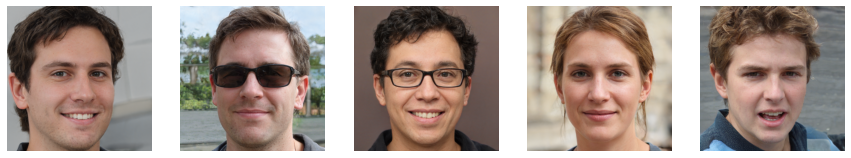

In [7]:
path='faces-spring-2020/faces-spring-2020/face-'
fig, axes = plt.subplots(1, 5, figsize=(15, 15))
for i in range(5):
    image = Image.open(df.iloc[i].path)
    axes[i].imshow(image)
    axes[i].axis('off')
plt.show()


In [8]:
df.head()

,id,path,glasses
0,1,faces-spring-2020/faces-spring-2020/face-1.png,0
1,2,faces-spring-2020/faces-spring-2020/face-2.png,1
2,3,faces-spring-2020/faces-spring-2020/face-3.png,1
3,4,faces-spring-2020/faces-spring-2020/face-4.png,0
4,5,faces-spring-2020/faces-spring-2020/face-5.png,0


It can be possbile to validate that the images have been correctly labelled as the first 5 images match the labels assigned to them in the dataframe. Now that the images have correct labels and it is know which file matches the label asssigned to the id proving the 0 is no glasses whilst 1 is glasses.
We can look at the dataset itself now as a whole. First starting with the Class distribution of the dataset

In [9]:
df.glasses.value_counts()

1    2856
0    1644
Name: glasses, dtype: int64

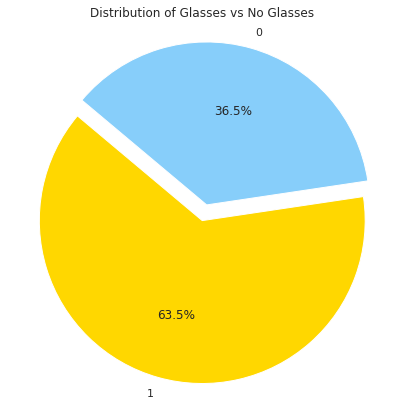

In [10]:
class_counts = df['glasses'].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', colors=['gold', 'lightskyblue'], startangle=140, explode=(0.1, 0))
plt.axis('equal')
plt.title('Distribution of Glasses vs No Glasses')
plt.show()

The above pie chart shows that there is a signficant class imbalance in the dataset  with 63.5% of glasses and 36.5% with glasses. Therefore since this is a major class imbalance that should be corrected before futher analysis. The reason as to why this should be corrected is because when models are trained on imbalanced datasets sets this tends to make the model favour one class over the other as it has been trained on it more as there is more prominence of it in the dataset.Thereby in order to ensure that the model provides accurate results and reliable results this class imbalance should be corrected.
The next step is to create a new dataset using this existing one but ensure that the classes are balanced.

In [11]:
dfg=df[df.glasses==1]
dfg.head()

,id,path,glasses
1,2,faces-spring-2020/faces-spring-2020/face-2.png,1
2,3,faces-spring-2020/faces-spring-2020/face-3.png,1
5,6,faces-spring-2020/faces-spring-2020/face-6.png,1
6,7,faces-spring-2020/faces-spring-2020/face-7.png,1
7,8,faces-spring-2020/faces-spring-2020/face-8.png,1


In [12]:
dfn=df[df.glasses==0]
dfn.head()

,id,path,glasses
0,1,faces-spring-2020/faces-spring-2020/face-1.png,0
3,4,faces-spring-2020/faces-spring-2020/face-4.png,0
4,5,faces-spring-2020/faces-spring-2020/face-5.png,0
8,9,faces-spring-2020/faces-spring-2020/face-9.png,0
10,11,faces-spring-2020/faces-spring-2020/face-11.png,0


First spilting the data in a set for each class will allow for easier equal integration of the dataset and its classes

In [13]:
def dataset(start,end):
    data=[]
    for i in range(start,end):
        data.append(dfn.iloc[i])
        data.append(dfg.iloc[i])
    return data

data=pd.DataFrame(data=dataset(0,1600))


Knowing that there is only 1644 images that dont contain glasses, this will be the upper limit of the dataset and thereby the number 1600 was chosen to for easier divisions. This means that the new dataset will contain 3200 records with 1600 of each class.

In [14]:
data.glasses.value_counts()

0    1600
1    1600
Name: glasses, dtype: int64

the above indicated that the new dataset does have equal class distribution and therefore further analysis can take place.

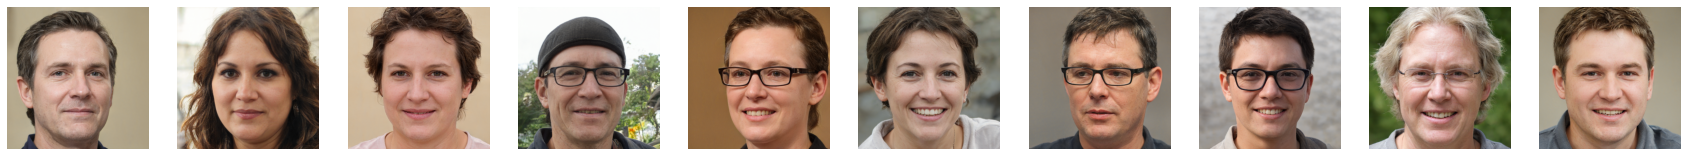

In [15]:

images=[]
while len(images)<10:
    num=random.randint(0,3200)
    if num not in images:
        images.append(num)
fig, axes = plt.subplots(1, 10, figsize=(30, 25))
for i in range(10):
    image = Image.open(data.iloc[images[i]].path)
    axes[i].imshow(image)
    axes[i].axis('off')
plt.show()

The above shows 10 random images from the dataset which is usefull in providing an understanding of this dataste. In this dataset the term glasses refer to both specticles as well as sunglasses as both are prevelant in the datset. It is also clear that this dataset is compiled of similarly framed faces in each image however not all of the faces, face the same way or orientation which shows that the dataset itself is diverse and this is a step already implemented that can help prevent undefitting as it increases the diversity in the dataset thereby increasing the model's complexity resulting in the reduced chance of underfitting occurring in the model.

In [16]:
image_sizes = [Image.open(img).size for img in data.path]  # Get width and height of all images
unique_sizes = set(image_sizes)
print(f"Unique image sizes: {unique_sizes}")

Unique image sizes: {(1024, 1024)}


The above code is used to check all of the sizes/dimensions of images that are contained in the dataset and from above is can be seen that the dataset has already been scaled in that all of the images are the same size of 1024x1024 which will later be resized and rescaled for the CNN model

## Data Wrangling

In this section the dataset will be prepped and an image data generator will be used to generated training and validation sets from labeled folders created in this section

In [111]:
!rm -rf Dataset

The above deletes the folder so that it can be recreated wil the proper images in the split in the event this notebook is rerun and more images are copied into the exiting folder. that lines prevents it from occuring.

In [112]:
# # Dipansu Joshi 
# # 2024
# # Kaggle
# # glasses-vs-no-glasses-best-model
# # https://www.kaggle.com/code/dipansujoshi/glasses-vs-no-glasses-best-model

y = data['glasses']
X = data.drop(columns=['glasses'])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

directory_of_images = 'faces-spring-2020/faces-spring-2020/'
source_dir = directory_of_images
destination_base_dir = 'Dataset'
train_dir = os.path.join(destination_base_dir, 'train')
val_dir = os.path.join(destination_base_dir, 'val')

os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

for label in data['glasses'].unique():
    os.makedirs(os.path.join(train_dir, str(label)), exist_ok=True)
    os.makedirs(os.path.join(val_dir, str(label)), exist_ok=True)

def copy_images(df, base_dir, is_labeled=True):
    for img_id, label in zip(df['id'], df.get('glasses', [None]*len(df))):
        img_name = f'face-{img_id}.png'  # Format the image name properly
        img_path = os.path.join(source_dir, img_name)
        if os.path.isfile(img_path):
            if is_labeled:
                dest_dir = os.path.join(base_dir, str(label))
            else:
                dest_dir = base_dir
            dest_path = os.path.join(dest_dir, img_name)
            shutil.copy2(img_path, dest_path)  
        else:
            print(f"File {img_name} not found.")

df_train = X_train.copy()
df_train['glasses'] = y_train
df_val = X_val.copy()
df_val['glasses'] = y_val

copy_images(df_train, train_dir)
copy_images(df_val, val_dir)

The above code creats a training and validation folder with the labelled subdirectories in the each folder. In then spilts up the images based on the train/test split and copies the images into the appriopriate folder. This allows for the directories of these folder to be used when creating the image datasets to be used in the CNN models.

In [113]:
datagen = ImageDataGenerator(
            rescale=1./255,
            featurewise_center=False,  
            samplewise_center=False,  
            featurewise_std_normalization=False, 
            samplewise_std_normalization=False,  
            zca_whitening=False, 
            rotation_range=20,  
            width_shift_range=0.1,  
            height_shift_range=0.1,  
            horizontal_flip=True,  
            vertical_flip=True)  

val_datagen = ImageDataGenerator(rescale=1./255)

The above code is the creation of two standards that will be followed when creating the image data, the first is the standard to use for creating the training image data which includes rescaling the image but also flipping it and shifting the image to increase the diversity of the dataset to thereby allow the model to be more complex and generalise better thereby another measure taken to prevent underfitting. The second set is the validation images which do not need to be diversified as these will be used to evaluate the model and therefore just need to be rescaled to the same size as the training images to ensure consistency for the model to accurately classify the imagess.

In [114]:
train_dataset = datagen.flow_from_directory(
    directory='Dataset/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

validation_dataset = val_datagen.flow_from_directory(
    directory='Dataset/val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 2560 images belonging to 2 classes.
Found 640 images belonging to 2 classes.


The above code is the actual generation of the image data, showcasing that the training set has 2560 images and the validation set has 640 images. Since this is a binary classification(glasses or no glasses), the class mode to the images has been set to binary. With the dataset pre-processed, it is ready to be used for model training,meaning the next step is to build the models.

## Model Building

The CNN will be using a kernel size of 4x4 which will later be compared to another CNN which uses a kernel size of 3x3 to determine how much of an affect and the kind of affect the kernel size has on the model in regard to this data. The CNN model has 3  2d Convolutional layers each with its own dropout and pooling layer. A single Conv2D layer is limited in what it can represent therefore the use of multiple layers allow the network to combine features in a non-linear way, improving its ability to capture complex patterns. As well as the use of Multiple pooling layers, applied to down-sample the spatial dimensions of the feature maps, reducing computational complexity which helps to retain the most important information and reduces the risk of overfitting. This can also be said for the use of multiple dropout layers as this encourages the model not to rely on certain neurons and increase no linearlity, and the switch of of these neurons helps reduce the chance of overfitting occurring. 

In [21]:
CNN = models.Sequential()
CNN.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
CNN.add(MaxPooling2D((2, 2)))
CNN.add(Dropout(0.2))
CNN.add(Conv2D(64, (3, 3), activation='relu'))
CNN.add(MaxPooling2D((2, 2)))
CNN.add(Dropout(0.2))
CNN.add(Conv2D(64, (3, 3), activation='relu'))
CNN.add(MaxPooling2D((2, 2)))
CNN.add(Dropout(0.2))
CNN.add(Flatten())
CNN.add(Dense(64, activation='relu'))
CNN.add(Dense(1, activation="sigmoid"))

as well as due to the nature of the dataformat, the Keras model does not work well with the sklearn metrics and therefore the use of keras metrics are needed for the proper and accurate evaluation.

In [22]:
metrics=['accuracy','recall','precision',AUC(name='roc_auc'),TruePositives(name='tp'),FalsePositives(name='fp'),TrueNegatives(name='tn'),FalseNegatives(name='fn')]

Now with the model being built, compiling the model is next:

In [23]:
CNN.compile(optimizer='adam',loss='binary_crossentropy',metrics=metrics)

The model will use a binary crossentropy loss fucntion as this is a binary classification problem. Before the model is trained some values are set before such as the max number of epochs which if the model is not stopped before that is when the model will stop training to prevent overfitting.
The is the early stopping which wil monitoor the validation loss and if after  epochs there is no improvement it will stop and restore the model to its best weigghts.

In [24]:
early =  EarlyStopping(monitor='val_loss',patience=2, verbose=1, restore_best_weights=True)

In [25]:
CH = CNN.fit(train_dataset, epochs=15, validation_data=validation_dataset, callbacks=[early])

Epoch 1/15


2024-11-17 14:51:35.987964: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 7 of 8
2024-11-17 14:51:37.568016: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


80/80 ━━━━━━━━━━━━━━━━━━━━ 169s 2s/step - accuracy: 0.4845 - fn: 145.1358 - fp: 531.8519 - loss: 0.9521 - precision: 0.4872 - recall: 0.7602 - roc_auc: 0.4739 - tn: 126.2222 - tp: 508.3951 - val_accuracy: 0.5000 - val_fn: 0.0000e+00 - val_fp: 320.0000 - val_loss: 0.6931 - val_precision: 0.5000 - val_recall: 1.0000 - val_roc_auc: 0.5000 - val_tn: 0.0000e+00 - val_tp: 320.0000
Epoch 2/15


2024-11-17 14:54:22.276323: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 7 of 8
2024-11-17 14:54:23.965826: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


80/80 ━━━━━━━━━━━━━━━━━━━━ 163s 2s/step - accuracy: 0.5009 - fn: 55.0864 - fp: 601.9259 - loss: 0.6932 - precision: 0.5059 - recall: 0.9237 - roc_auc: 0.5024 - tn: 51.4444 - tp: 603.1481 - val_accuracy: 0.4984 - val_fn: 320.0000 - val_fp: 1.0000 - val_loss: 0.6922 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_roc_auc: 0.5853 - val_tn: 319.0000 - val_tp: 0.0000e+00
Epoch 3/15


2024-11-17 14:57:05.334599: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 7 of 8
2024-11-17 14:57:06.939266: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


80/80 ━━━━━━━━━━━━━━━━━━━━ 163s 2s/step - accuracy: 0.5579 - fn: 267.4568 - fp: 292.8148 - loss: 0.6772 - precision: 0.5708 - recall: 0.5510 - roc_auc: 0.5916 - tn: 350.3827 - tp: 400.9506 - val_accuracy: 0.8375 - val_fn: 82.0000 - val_fp: 22.0000 - val_loss: 0.4132 - val_precision: 0.9154 - val_recall: 0.7437 - val_roc_auc: 0.8966 - val_tn: 298.0000 - val_tp: 238.0000
Epoch 4/15


2024-11-17 14:59:48.190897: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 7 of 8
2024-11-17 14:59:49.786086: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


80/80 ━━━━━━━━━━━━━━━━━━━━ 163s 2s/step - accuracy: 0.7559 - fn: 178.3210 - fp: 122.9506 - loss: 0.5250 - precision: 0.7859 - recall: 0.7162 - roc_auc: 0.8129 - tn: 532.3333 - tp: 478.0000 - val_accuracy: 0.8750 - val_fn: 58.0000 - val_fp: 22.0000 - val_loss: 0.3974 - val_precision: 0.9225 - val_recall: 0.8188 - val_roc_auc: 0.9101 - val_tn: 298.0000 - val_tp: 262.0000
Epoch 5/15


2024-11-17 15:02:31.460701: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 7 of 8
2024-11-17 15:02:33.062377: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


80/80 ━━━━━━━━━━━━━━━━━━━━ 163s 2s/step - accuracy: 0.8145 - fn: 163.3827 - fp: 79.5309 - loss: 0.4469 - precision: 0.8537 - recall: 0.7437 - roc_auc: 0.8635 - tn: 584.3827 - tp: 484.3087 - val_accuracy: 0.8734 - val_fn: 59.0000 - val_fp: 22.0000 - val_loss: 0.3759 - val_precision: 0.9223 - val_recall: 0.8156 - val_roc_auc: 0.9127 - val_tn: 298.0000 - val_tp: 261.0000
Epoch 6/15


2024-11-17 15:05:14.113811: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 7 of 8
2024-11-17 15:05:15.719436: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


80/80 ━━━━━━━━━━━━━━━━━━━━ 162s 2s/step - accuracy: 0.8307 - fn: 156.5679 - fp: 71.5185 - loss: 0.4092 - precision: 0.8813 - recall: 0.7652 - roc_auc: 0.8847 - tn: 584.5185 - tp: 499.0000 - val_accuracy: 0.8875 - val_fn: 51.0000 - val_fp: 21.0000 - val_loss: 0.3493 - val_precision: 0.9276 - val_recall: 0.8406 - val_roc_auc: 0.9143 - val_tn: 299.0000 - val_tp: 269.0000
Epoch 7/15


2024-11-17 15:07:56.190622: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 7 of 8
2024-11-17 15:07:57.730050: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


80/80 ━━━━━━━━━━━━━━━━━━━━ 160s 2s/step - accuracy: 0.8390 - fn: 157.1852 - fp: 64.2222 - loss: 0.3863 - precision: 0.8905 - recall: 0.7620 - roc_auc: 0.8936 - tn: 603.4815 - tp: 486.7161 - val_accuracy: 0.8828 - val_fn: 50.0000 - val_fp: 25.0000 - val_loss: 0.3536 - val_precision: 0.9153 - val_recall: 0.8438 - val_roc_auc: 0.9110 - val_tn: 295.0000 - val_tp: 270.0000
Epoch 8/15


2024-11-17 15:10:36.630540: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 7 of 8
2024-11-17 15:10:38.205890: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


80/80 ━━━━━━━━━━━━━━━━━━━━ 160s 2s/step - accuracy: 0.8623 - fn: 142.6667 - fp: 46.9753 - loss: 0.3613 - precision: 0.9260 - recall: 0.7810 - roc_auc: 0.9065 - tn: 617.7531 - tp: 504.2099 - val_accuracy: 0.8844 - val_fn: 54.0000 - val_fp: 20.0000 - val_loss: 0.3383 - val_precision: 0.9301 - val_recall: 0.8313 - val_roc_auc: 0.9203 - val_tn: 300.0000 - val_tp: 266.0000
Epoch 9/15


2024-11-17 15:13:16.590272: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 7 of 8
2024-11-17 15:13:18.158678: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


80/80 ━━━━━━━━━━━━━━━━━━━━ 160s 2s/step - accuracy: 0.8464 - fn: 138.3951 - fp: 57.3580 - loss: 0.3777 - precision: 0.9023 - recall: 0.7846 - roc_auc: 0.9018 - tn: 592.9630 - tp: 522.8889 - val_accuracy: 0.8938 - val_fn: 45.0000 - val_fp: 23.0000 - val_loss: 0.3712 - val_precision: 0.9228 - val_recall: 0.8594 - val_roc_auc: 0.9108 - val_tn: 297.0000 - val_tp: 275.0000
Epoch 10/15


2024-11-17 15:15:56.857142: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 7 of 8
2024-11-17 15:15:58.413756: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


80/80 ━━━━━━━━━━━━━━━━━━━━ 160s 2s/step - accuracy: 0.8651 - fn: 134.5309 - fp: 42.2593 - loss: 0.3739 - precision: 0.9208 - recall: 0.7883 - roc_auc: 0.8991 - tn: 622.7654 - tp: 512.0494 - val_accuracy: 0.8813 - val_fn: 41.0000 - val_fp: 35.0000 - val_loss: 0.4285 - val_precision: 0.8885 - val_recall: 0.8719 - val_roc_auc: 0.9055 - val_tn: 285.0000 - val_tp: 279.0000
Epoch 10: early stopping
Restoring model weights from the end of the best epoch: 8.


With the baseline CNN trained the next step is to use a pipeline to trained and fit a second CNN that will be used for comparison. This CNN will use a kernel size of 3x3 to measure how the difference in kernel size affects the models performance.

#### Pipeline

In [118]:
X_train.drop(columns='id',axis=1,inplace=True)
X_train=X_train.to_numpy().ravel()

In [119]:
  

class ImagePreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self, target_size=(224, 224), rescale=1.0 / 255):
        self.target_size = target_size
        self.rescale = rescale


    def transform(self, X):
        processed_images = []
        for img_path in X:  
            img = Image.open(img_path).convert("RGB")  
            img = img.resize(self.target_size)  
            img = np.array(img) * self.rescale  
            processed_images.append(img)
        return np.array(processed_images)


class ImageDataGeneratorWrapper(BaseEstimator, TransformerMixin):
    def __init__(self, datagen, directory, target_size=(224, 224), batch_size=32, class_mode='binary'):
        self.datagen = datagen
        self.directory = directory
        self.target_size = target_size
        self.batch_size = batch_size
        self.class_mode = class_mode
    
    def transform(self, X):
        return self.datagen.flow_from_directory(
            directory=self.directory,
            target_size=self.target_size,
            batch_size=self.batch_size,
            class_mode=self.class_mode
        )


pipeline = Pipeline([
        ('preprocessor', ImagePreprocessor(target_size=(224, 224), rescale=1.0 / 255)),  
        ('data_augmentation', ImageDataGeneratorWrapper(datagen=datagen, directory='Dataset/train')), 
    ])

In [120]:
m = models.Sequential()
m.add(Conv2D(32, (5, 5), activation='relu', input_shape=( 224, 224, 3)))
m.add(MaxPooling2D((2, 2)))
m.add(Dropout(0.2))
m.add(Conv2D(64, (5, 5), activation='relu'))
m.add(MaxPooling2D((2, 2)))
m.add(Dropout(0.2))
m.add(Conv2D(64, (5, 5), activation='relu'))
m.add(MaxPooling2D((2, 2)))
m.add(Dropout(0.2))
m.add(Flatten())
m.add(Dense(64, activation='relu'))
m.add(Dense(1, activation="sigmoid"))
m.compile(optimizer='adam',loss='binary_crossentropy',metrics=metrics)

In [121]:
h5=m.fit(pipeline.transform(X_train), epochs=15, validation_data=validation_dataset, callbacks=[early])

Found 2560 images belonging to 2 classes.
Epoch 1/15


2024-11-17 17:37:42.352385: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:201: Filling up shuffle buffer (this may take a while): 7 of 8
2024-11-17 17:37:43.971409: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


80/80 ━━━━━━━━━━━━━━━━━━━━ 173s 2s/step - accuracy: 0.5000 - fn: 509.8889 - fp: 222.4074 - loss: 0.7220 - precision: 0.4958 - recall: 0.3334 - roc_auc: 0.7389 - tn: 753.5926 - tp: 465.7161 - val_accuracy: 0.5000 - val_fn: 0.0000e+00 - val_fp: 320.0000 - val_loss: 0.6932 - val_precision: 0.5000 - val_recall: 1.0000 - val_roc_auc: 0.5000 - val_tn: 0.0000e+00 - val_tp: 320.0000
Epoch 2/15


2024-11-17 17:40:33.039575: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:201: Filling up shuffle buffer (this may take a while): 7 of 8
2024-11-17 17:40:34.631652: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


80/80 ━━━━━━━━━━━━━━━━━━━━ 172s 2s/step - accuracy: 0.4998 - fn: 0.0000e+00 - fp: 650.5803 - loss: 0.6932 - precision: 0.4998 - recall: 1.0000 - roc_auc: 0.4936 - tn: 0.0000e+00 - tp: 661.0247 - val_accuracy: 0.5000 - val_fn: 0.0000e+00 - val_fp: 320.0000 - val_loss: 0.6932 - val_precision: 0.5000 - val_recall: 1.0000 - val_roc_auc: 0.5000 - val_tn: 0.0000e+00 - val_tp: 320.0000
Epoch 2: early stopping
Restoring model weights from the end of the best epoch: 1.


## Evaluation
For the puproses of brevity as well as coherency the CNN with a Kernel size of 3x3 will be referred to as 3x whilst the CNN with kernel size of 5x5 will be referred to as 5x.

In [122]:
scores=CNN.evaluate(validation_dataset,return_dict=True)
f1_score = 2 * (scores['precision'] * scores['recall']) / (scores['precision'] + scores['recall'])
scores['f1']=f1_score
print(scores)

20/20 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.8941 - fn: 27.1905 - fp: 11.3810 - loss: 0.3172 - precision: 0.9293 - recall: 0.8378 - roc_auc: 0.9224 - tn: 171.3333 - tp: 140.5714
{'accuracy': 0.8843749761581421, 'fn': 54.0, 'fp': 20.0, 'loss': 0.33833664655685425, 'precision': 0.9300699234008789, 'recall': 0.831250011920929, 'roc_auc': 0.9202783703804016, 'tn': 300.0, 'tp': 266.0, 'f1': 0.877887792456085}


In [133]:
s5= m.evaluate(validation_dataset,return_dict=True)
f1= 2 * (s5['precision'] * s5['recall']) / (s5['precision'] + s5['recall'])
s5['f1']=f1
print(s5)

20/20 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.4987 - fn: 0.0000e+00 - fp: 176.2381 - loss: 0.6932 - precision: 0.4987 - recall: 1.0000 - roc_auc: 0.5000 - tn: 0.0000e+00 - tp: 174.2381
{'accuracy': 0.5, 'fn': 0.0, 'fp': 320.0, 'loss': 0.693152666091919, 'precision': 0.5, 'recall': 1.0, 'roc_auc': 0.5, 'tn': 0.0, 'tp': 320.0, 'f1': 0.6666666666666666}


### Training vs Validation

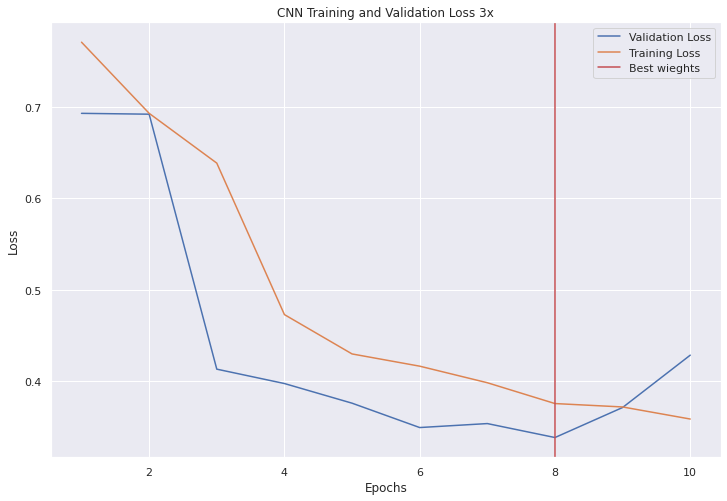

In [134]:
val_loss = CH.history['val_loss']

train_loss = CH.history['loss']

plt.plot(list(range(1, 11)),val_loss , label='Validation Loss')
plt.plot(list(range(1, 11)),train_loss,  label='Training Loss')
plt.axvline(x = 8, label = 'Best wieghts', color='r')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('CNN Training and Validation Loss 3x')
plt.legend()
plt.show()

Regarding the validtion and training losses, whilst it was decreasing it was not entirely consistent. In terms of overfitting and underfitting, it is good that the validation loss is lower than the training loss as this means that there is little chance of overfitting occurring in the model as with overfitting the model would have more errors on the validation set as it would be unable to generalise well to unseen data which is not the case in the above graph. In terms of underfitting, there is little evidence to suggest any risk of underfitting as both losses kept decreasing meaning that the model was able to learn from the training data well enough each iteration to decrease loses and yet not oversimplify the rules. Therefore at epoch it can be said to be the best point for the model as afterwards the validation loss begings to increase whilst the training loss begins to decrease, a sign of overfitting. Therefore it can be said that the wights at epoch 8 were the most optimal 

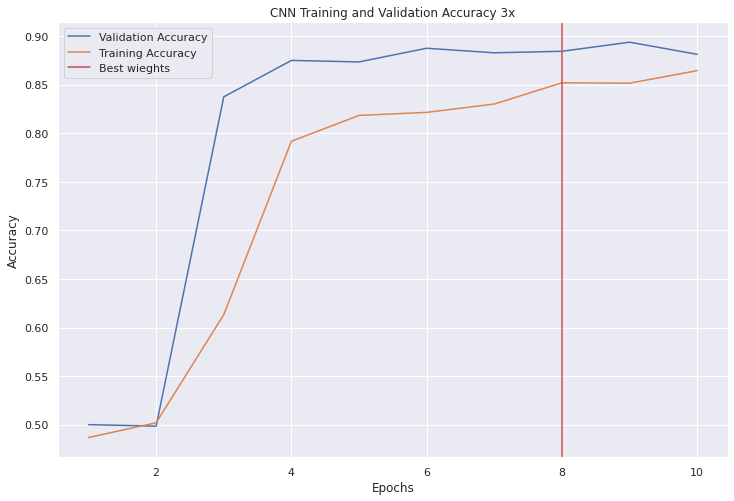

In [135]:
val_accuracy = CH.history['val_accuracy']
train_accuracy = CH.history['accuracy']

plt.plot(list(range(1, 11)),val_accuracy, label='Validation Accuracy')
plt.plot(list(range(1, 11)),train_accuracy,label='Training Accuracy')
plt.axvline(x = 8,label = 'Best wieghts',color='r')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('CNN Training and Validation Accuracy 3x')
plt.legend()
plt.show()

In regards to training and validation accuracy the model had a steady increase in both sets which is a good sign in model performance, as well as that validation accuracy was always higher than training accuracy meaning that the model was able to generalise better with unseen data and thereby correctly classify unseen better than the training data. This is also a sign that overfitting did not occur in the model as usually in cases of overfitting, the training accuracy will increase whilst the validation accuracy decreases as the model learns the noise of the training data too well. It can be said that after epoch 8 the model started to degrade in performance as it had an increase in validation accuracy but decrease in training accuracy meaning it didnt adapt to the traing data more which is not consistent, afterwards it increased in training accuracy but decreased in validation accuracy which is a sign of overfitting and therefore it can said that the wieghts at epoch 8 are the most optimal for the model.

### Confusion Matrix

A confusion matrix is a table used to evaluate the performance of a classification model. It allows you to visualize the performance of an algorithm by comparing the actual (true) labels with the predicted labels made by the model (Delovski, 2023). The matrix provides a detailed breakdown of the model's correct and incorrect predictions, helping you understand where the model is making errors

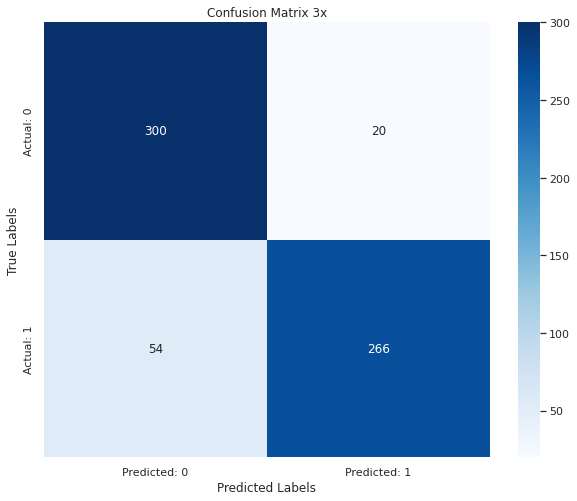

In [136]:
conf_matrix = np.array([[int(scores['tn']),int(scores['fp']) ], [int(scores['fn']), int(scores['tp'])]])

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted: 0", "Predicted: 1"], yticklabels=["Actual: 0", "Actual: 1"])
plt.title('Confusion Matrix 3x')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

The above confusion matrix shows that the model performed decently well only misclassifying a toal of 74 images out of the 640 tests but it also shows that the model has a tendency to misclassify more FN then it does with FP. Showcasing that the model will likely have a higher precision score than recall score as less FP occured

### Accuracy
Accuracy is the measure of how correct classifier is, as it takes the total number of correct predictions and divides it by the total number of predictions made (Agrawal, 2024). It allows for a general understanding of the ratio of correct predictions in the overall predictions. While this is a good indication of the model's performance accuracy does not take into account the false positive and false negatives. Accuracy is a good measure when the target is well balanced, as this would result in equal opportunities to make make true or false predictions equally thereby allowing a proper gauge at the model's accuracy (Wohlwend, 2023).

In [137]:
print(f'Accraucy score for 3x model is:  ' +str(scores['accuracy']))
print(f'Accraucy score for 5x model is: ' +str(s5['accuracy']))


Accraucy score for 3x model is:  0.8843749761581421
Accraucy score for 5x model is: 0.5


The 3x model had a accuracy of 88.44 showcasing a fairly good predictive power, where as the 5x model had an accuracy of was ----

### Precision

Precision is the measure of how positively correct a classifier is as it is the number of true positives divided by the sum of true and false positives. Precision expresses the proportion of data correctly predicted as positive (Delovski, 2023). Using it as a metric, you can define the percent of the predicted class inside the data you classified as that class (Wohlwend, 2023). In other words, precision helps you measure how often the model correctly predicted that a data point belongs to the class the model assigned to it. 
<br><br>
In the context of this dataset the metric of precision is of a higher concer than recell. Since the context of the dataset was centered around a contest of correct classification, it is therefore more important that the model be able to correctly classify the images in the dataset whilst it can be said that both recall and precision(f1 score) can be held on equal wieghting as the aim is to correctly classify overall, precision is slightly more important in the context of a competition as the more correctly classified positives.

In [138]:
print(f'Precision score for 3x model is:'+str(scores['precision']))
print(f'Precision score for 5x model is:'+str(s5['precision']))

Precision score for 3x model is:0.9300699234008789
Precision score for 5x model is:0.5


The 3x model had a high precision score which is indicative of the confusion matrix previously discussed as it the model had less FP than FN thereby leading to the high precision score of 93. However the 5x model has a precision score of --- showing that is was not  able to correctly classify positive cases as well as the 3x mold

### Recall
Recall is a measure of the true positives cases in all correctly predicted cases in the model(Agrawal, 2024). Recall is defined as the number of true positives divided by the sum of true positives and false negatives (Delovski, 2023). It expresses the ability to find all relevant instances in a dataset. Recall measures how good your model is at correctly predicting positive cases. Recall is a useful metric in cases where False Negative is of higher concern than False Positive.<br>

In the context of the dataset a False Negative is of a negative is of less importance when compared to the correct classfication of the dataset as a whole as there is not negative results or adverse effects to the false classfication of one class over another. Thereby it can be said that recall is of less importance in the context of this dataset. As the miss classifcation of someone with glasses as someone without does not pose any negative outcomes.

In [ ]:
print(f'Recall score for 3x model is: '+str(scores['recall']))
print(f'Recall score for 5x model is: '+str(s5['recall']))

Recall score for 3x model is: 0.831250011920929
Recall score for 3x model is: 1.0


The 3x mode has a recall score of 83.13 which is lower than its precision which was discussed earlier as there were more FN cases than FP, this is most likely due to contract between skin and classes as the model was most likley unable to distinguish those edge case scenarios leading to higher FN. It is also worth nothing that the 5x model achieved a recall score of --- which shows that it---

### F1 Score
The F1 score is a metric that combines both Precision and Recall which provides a balance between Precision and Recall and can be a better measure than Accuracy since this dataset is unbalanced (Wohlwend, 2023) . F1 score is the harmonic mean of Precision and Recall. A high F1 score is a good indicator that the model performed well because to achieve a high score both precision and recall need to be high.
<br><br>
In the context of the dataset the F1 score is extremely important since there is no negative outcomes for misclassifications of classes, it can be said that precision and recall are of equal value which means that the F1 score is of the higher importance as it is the combination of the two score, thereby prioritizing it in the context of the dataset. 

In [140]:
print(f'F1 score for 3x model is:'+str(scores['f1']))
print(f'F1 score for 5x model is:'+str(s5['f1']))

F1 score for 3x model is:0.877887792456085
F1 score for 5x model is:0.6666666666666666


This F1 score of 87.79 is a good indicator as to the models performance showing that the high precision and decent recall of the 3x model resulted in the fairly decent f1 score. Since the 3x model has a significantly higher f1 score compared to the 5x model of --- it can be said that the 3x model is more suitable for the scenario at hand.

### ROC Receiver-operating characteristic curve and AUC Area under the curve
A Receiver-operating characteristic curve (ROC) is used for classification problems in which the True positive rate (Recall) and False positive rate are plotted on a graph, across various threshold settings, illustrating how well the model distinguishes between positive and negative classes (Bhandari, 2024). The ROC curve provides insights into the trade-offs between sensitivity (true positive rate) and the false positive rate as the classification threshold changes (Bhandari,2024).

The Area Under the Curve (AUC) is the measure of the ability of a binary classifier to distinguish between classes and is used as a summary of the ROC curve (Bhandari,2024). AUC value ranges from 0 to 1, where a higher AUC indicates a better-performing model. An AUC of 1 signifies perfect classification, while an AUC of 0.5 suggests random guessing (Bhandari,2024).The higher the AUC, the better the model's performance at distinguishing between the positive and negative classes. The ROC curve and AUC are particularly useful in scenarios with class imbalance, as they evaluate the model's performance independent of the threshold and provide a comprehensive measure of its discriminatory power.

<br>
for the context of the dataset the ROC-AUC score is on par if not higher than the F1 score in terms of importance as since this is a binary classification, it weights or treats both types of misclassifications equally thereby showing how well the model itself is able to separate the classes. One thing that should be taken into account is that this dataset is perfectly balance which means that the ROC-AUC thereby not weight one class over the other which may occur in the f1 score. 

In [141]:
print(f'ROC-AUC score for 3x model is:'+str(scores['roc_auc']))
print(f'ROC-AUC score for 5x model is:'+str(s5['roc_auc']))

ROC-AUC score for 3x model is:0.9202783703804016
ROC-AUC score for 5x model is:0.5


The ROC-AUC of the 3x model can be argued to be the most vital and important score in accurately detailing the performance of the model as mentioned above, it has a high score of 92.03, indicating that is model is well able to distinguish between the two class when it comes to classifying images as glasses or no glasses. Compare to the 5x model which has a ROC-AUC score of ----, it can be said that ---- 

### Summary 
As discussed above it can be said that when a model has a decent accuracy the other scores that should be concerned with are the recall and precision, however with the context of the dataset and its distribution in mind is it therefore prevalent that ROC-AUC is the most important score followed by f1 and lastly accuracy, as the class are balanced and there are no negative outcomes for misclassification and no specific threshold in terms of precision or recall matters. With that in mind the scores of most importance are ROC-AUC, F1 and Accuracy in that order and base on the scores of both 3x and 5x it is clearly evident that the 3xCNN model performed better than the 5x model with the dataset.

## Possible Improvements
From the above evaluations is can be said that the CNN with kernel size of 3x3(3x) performed better than the CNN with kernel size of 5x5(5x) in the context of the dataset. Not only did the 3x have the better scores all round but also had the better scores in the metrics that were of higher importance(ROC-AUC and F1). This can most likely be attributed to the fact the with a smaller kernel size the model was able to focus on smaller details in the images and considering the context of the dataset, the image themselves were small and of only the face meaning the the details that would distinguish glasses would be small. Therefore being able to learn smaller details better than the 5xCNN the 3xCNN was able to drastically outperform in comparison.

However there are steps that can be taken to further improve both models which could lead to better results and possible more discrepancies in model performance to better showcase the models differences. It can be said that the reason for the models better performance can be it kernel size as 3x3 because they balance detail extraction and computational efficiency well thereby allowing finer details to be capture and 5x5 looks more at bigger details and in the context of this dataset in which glasses where being observed the smaller details were able to allow the model to perform better. Thus further investigation can be made into using a 1x1 kernel size and how that could affect the performance of a CNN model on this dataset as it can be speculated that learning finer details could improve the models performance. It is also worth nothing that the curated training set was a total size of 2560 images which opens an area of further investigation into how more images added to the dataset could improve performance as well as the data augmentation increases of these images to encourage more diversity. 


## Conclusion
In conclusion it can be said based on the above analysis that a CNN model with the kernel size of 3x3 performed better in the context of the dataset. However to get the full scope of the model's capabilities, a smaller kernel size should be tested along with more images in the training and testing data to get a more encompassing view of the models strengths and weaknesses.

# References

Agrawal, S.K., 2024. Metrics to Evaluate your Classification Model to take the right decisions. [Online]<br>
Available at: https://www.analyticsvidhya.com/blog/2021/07/metrics-to-evaluate-your-classification-model-to-take-the-right-decisions/<br>
[Accessed 15 November 2024]<br><br>

Banoula, M. 2022. An Introduction to Logistic Regression in Machine Learning.[Online].<br>
Available at:https://www.simplilearn.com/tutorials/machine-learning-tutorial/logistic-regression-in-python<br>
[Accessed 15 November 2024]<br><br>

Bhandari, A. 2024. Guide to AUC ROC Curve in Machine Learning : What Is Specificity?.[Online].<br>
Available at:https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/<br>
[Accessed 15 November 2024]<br><br>

Bromberg, M., 2024. Harmonic Mean Definition, Formula, and Examples. [Online]<br>
Available at:https://www.investopedia.com/terms/h/harmonicaverage.asp<br>
[Accessed 15 November2024]<br><br>

Delovskli, B., 2023. How to Evaluate Classification Models. [Online]<br>
Available at: https://www.edlitera.com/en/blog/posts/evaluating-classification-models<br>
[Accessed 15 November 2024]<br><br>

Heaton, J. 2020. Applications of Deep Learning.[Online].<br>
Available at: https://kaggle.com/competitions/applications-of-deep-learningwustl-spring-2020<br>
[Accessed 15 November 2024]<br><br>

John, R. 2024. What is Image Classification: Applications, Techniques & Tools for Enhanced Data Extraction [Online].<br>
Available at: https://www.docsumo.com/blogs/data-extraction/image-classification <br>
[Accessed 15 November 2024]<br><br>

Maghana. 2023.Deep Learning Approach to Binary Image Classification.[Online]<br>
Available at: https://blog.aiensured.com/deep-learning-approach-to-binary-image-classification/ <br>
[Accessed 15 November 2024]<br><br>

Olamendy,J. C. 2023.Understanding Early Stopping: A Key to Preventing Overfitting in Machine Learning [Online].<br>
Available at: https://medium.com/@juanc.olamendy/understanding-early-stopping-a-key-to-preventing-overfitting-in-machine-learning-17554fc321ff<br>
[Accessed 15 November 2024]<br><br>

Rouse, M. 2024.Image Classification [Online].<br>
Available at: https://www.techopedia.com/definition/image-classification<br>
[Accessed 15 November 2024]<br><br>